Using a Perceptron to Classify Poisonous and Edible Mushrooms

Project-2, Shuzo Katayama, September 11 2020

Data from: https://www.kaggle.com/uciml/mushroom-classification

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcdefaults()

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        #self.w_ = np.zeros(1 + X.shape[1]) ###
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            #print(ppn.w_) ###
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
# Import Dataset from CSV
df = pd.read_csv('datasets_478_974_mushrooms.csv')

In [4]:
a = df.to_numpy()

The data is in 3 rows, and I have to convert the strings into numbers

0: Poisonous or Edible\
1: Color (With corresponding nm wavelength)\
2: Odor (0: none, 1: musty, 2: fishy, 3: foul, 4: pungent)

In [5]:
# Converting p (poisonous) to -1 and e (edible) to 1
for item in a:
    if item[0] == "p":
        item[0] = -1
    else: 
        item[0] = 1

In [6]:
# Converting color to its approximate spectral wavelength

for item in a:
    if item[1] == "n":
        item[1] = 645
    if item[1] == "b":
        item[1] = 585
    if item[1] == "c":
        item[1] = 615
    if item[1] == "r":
        item[1] = 525
    if item[1] == "u":
        item[1] = 410
    if item[1] == "e":
        item[1] = 700
    if item[1] == "y":
        item[1] = 600
a
    

array([[1, 585, 'n'],
       [1, 585, 'n'],
       [1, 585, 'n'],
       ...,
       [-1, 600, 'n'],
       [-1, 600, 'n'],
       [-1, 600, 'n']], dtype=object)

In [7]:
# Converting Odors to numbers
# n: 0, m: 1, y: 2, f: 3, p: 4
# rows with other odors will be deleted

for item in a:
    if item[2] == "n":
        item[2] = 0
    if item[2] == "m":
        item[2] = 1
    if item[2] == "y":
        item[2] = 2
    if item[2] == "f":
        item[2] = 3
    if item[2] == "p":
        item[2] = 4
        
a
# Tony Ni helped me extract extranneous data 
# (ie. data containing not n,m,y,f, or p in the third column)

array([[1, 585, 0],
       [1, 585, 0],
       [1, 585, 0],
       ...,
       [-1, 600, 0],
       [-1, 600, 0],
       [-1, 600, 0]], dtype=object)

Classifying into poisonous and edible:

First column in a: p for poisonous and e for edible

In [8]:
# Poisonous mushrooms
poisonous = a[a[:,0]==-1, :3]
# Edible Mushrooms
edible = a[a[:,0]==1, :3]

Plotting the data before it is put through the perceptron:

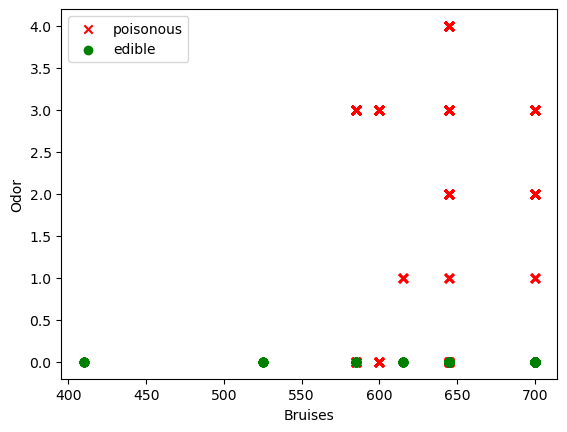

In [9]:
plt.scatter(poisonous[:, 1], poisonous[:, 2], color='red', marker='x', label='poisonous')
plt.scatter(edible[:, 1], edible[:, 2], color='green', marker='o', label='edible')
plt.xlabel('Bruises')
plt.ylabel('Odor')
plt.legend(loc='upper left')
plt.show()

Putting Data through perceptron

In [10]:
X = a[:, 1:]
X

array([[585, 0],
       [585, 0],
       [585, 0],
       ...,
       [600, 0],
       [600, 0],
       [600, 0]], dtype=object)

In [11]:
y = a[:, 0]
y

array([1, 1, 1, ..., -1, -1, -1], dtype=object)

In [14]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''